In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection, tree, metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import log_loss
from xgboost.sklearn import XGBRegressor, XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

furnace = pd.read_csv(r"C:\Users\panda4\Downloads\MetalFurnace-Participants_Data\Train.csv")
furnace

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.264250,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2
5,-0.825098,-0.264250,-0.461423,0.409400,1.305455,-0.276144,-2.695676,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,1.087230,-0.687687,0.271886,-0.232472,0.102129,3
6,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,-2.695676,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.233674,1.332042,1.877777,0.271886,-0.232472,0.102129,2
7,0.511733,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.910605,-0.406121,-0.608830,0.271886,-0.232472,0.102129,2
8,-0.379487,4.550071,-0.461423,0.409400,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,1.233010,-0.332678,-0.687687,0.271886,3.727218,0.102129,2
9,0.066123,-0.264250,-0.461423,0.409400,1.305455,2.665597,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,-0.232472,0.102129,2


[]

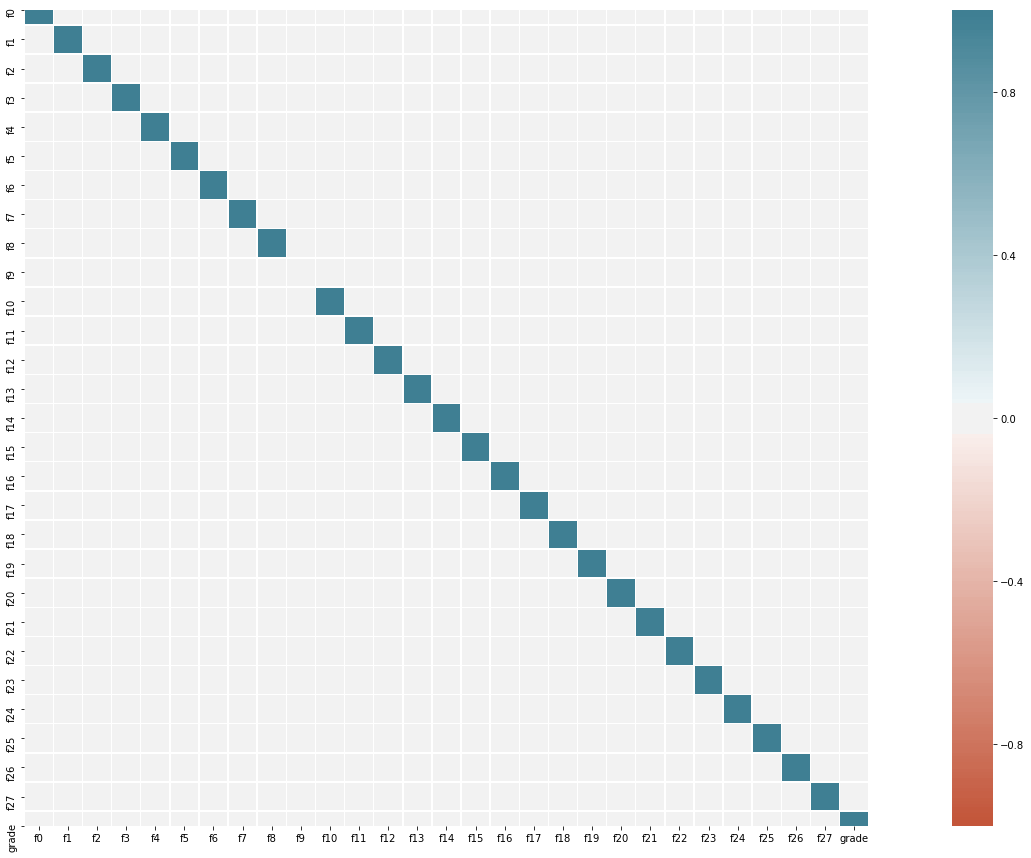

In [23]:
corr = furnace.corr()
plt.figure(figsize=(30,15))
ax = sns.heatmap(
    corr>0.9, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

In [24]:
X = furnace.drop(['f9', 'grade'], axis=1)
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f10,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.395874,...,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129
1,-0.825098,-0.264250,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.182574,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129
2,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.395874,...,0.182574,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129
3,0.511733,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.182574,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129
4,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,-2.526055,...,0.182574,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129
5,-0.825098,-0.264250,-0.461423,0.409400,1.305455,-0.276144,-2.695676,0.090167,0.107958,0.395874,...,0.182574,0.085505,0.233285,-1.080663,0.443257,1.087230,-0.687687,0.271886,-0.232472,0.102129
6,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,-2.695676,0.090167,0.107958,0.395874,...,0.182574,0.085505,0.233285,0.925358,-0.233674,1.332042,1.877777,0.271886,-0.232472,0.102129
7,0.511733,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.182574,0.085505,0.233285,0.925358,-0.910605,-0.406121,-0.608830,0.271886,-0.232472,0.102129
8,-0.379487,4.550071,-0.461423,0.409400,1.305455,-0.276144,0.370965,0.090167,0.107958,0.395874,...,0.182574,0.085505,0.233285,-1.080663,1.233010,-0.332678,-0.687687,0.271886,3.727218,0.102129
9,0.066123,-0.264250,-0.461423,0.409400,1.305455,2.665597,0.370965,0.090167,0.107958,0.395874,...,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,-0.232472,0.102129


In [68]:
y = pd.DataFrame(furnace['grade'], columns = ['grade'])
y

,grade
0,2
1,4
2,2
3,2
4,2
5,3
6,2
7,2
8,2
9,2


In [26]:
test_size = 0.3
seed = 3
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = test_size, random_state = seed)

In [53]:
num_folds = 10
scoring = 'accuracy'

models = []
models.append(('Logistic', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB', XGBClassifier()))
models.append(('Forest', RandomForestClassifier()))
models.append(('Light', LGBMClassifier()))
models.append(('ADA', AdaBoostClassifier()))

In [54]:
results = []

names = []
model_comp = pd.DataFrame(columns=['Model', 'Test Accuracy', 'Std Dev'])

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp = model_comp.append([{'Model': name, 'Test Accuracy': cv_results.mean(), 'Std Dev': cv_results.std()}])

model_comp

,Model,Test Accuracy,Std Dev
0,Logistic,0.850106,0.049738
0,CART,0.933245,0.030028
0,GB,0.956078,0.035143
0,Forest,0.956078,0.030256
0,Light,0.949154,0.043749
0,ADA,0.780867,0.063147


In [77]:
# Create Base Learners
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]

layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)
clf.fit(X_train, y_train).score(X_valid, y_valid)
clf.predict_proba(X)
#print ("log_loss", log_loss(y, predicted))

array([[0.01544666, 0.23064452, 0.71920059, 0.01863517, 0.01607307],
       [0.0174961 , 0.02016548, 0.0840738 , 0.0227329 , 0.85553172],
       [0.00407224, 0.0295577 , 0.95148772, 0.00550241, 0.00937993],
       ...,
       [0.00410816, 0.02960815, 0.95115505, 0.00554974, 0.0095789 ],
       [0.00403006, 0.02934362, 0.95194319, 0.00544552, 0.00923761],
       [0.00410816, 0.02960815, 0.95115505, 0.00554974, 0.0095789 ]])

In [75]:
predicted_values = pd.get_dummies(predicted_df)
predicted_values

,0
0,2
1,4
2,2
3,1
4,2
5,2
6,2
7,2
8,2
9,2


In [102]:
furnace_test = pd.read_csv(r"C:\Users\panda4\Downloads\MetalFurnace-Participants_Data\Test.csv")
X_test = furnace_test.drop(['f9'], axis=1)
X_test

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f10,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,-0.837812,-0.273636,1.276580,0.463262,-0.585142,-0.242870,0.349804,0.12356,0.166795,0.445195,...,0.197642,0.06143,0.277350,0.886135,-0.568935,1.100428,-0.244589,0.229718,-0.217109,0.087039
1,2.078087,-0.273636,-0.496119,0.463262,-2.438092,-0.242870,0.349804,0.12356,0.166795,0.445195,...,-5.059644,0.06143,0.277350,0.886135,0.504299,-0.434268,-0.244040,0.229718,-0.217109,0.087039
2,-0.837812,-0.273636,1.276580,0.463262,-0.585142,-0.242870,0.349804,0.12356,0.166795,0.445195,...,0.197642,0.06143,0.277350,-1.128496,-0.568935,-0.434268,-0.662763,0.229718,-0.217109,0.087039
3,-0.837812,-0.273636,-0.496119,0.463262,1.267808,-0.242870,-2.858743,0.12356,0.166795,0.445195,...,-5.059644,0.06143,0.277350,-1.128496,-0.449819,-1.918647,-0.662763,0.229718,-0.217109,0.087039
4,-0.837812,-0.273636,-0.496119,0.463262,-0.585142,-0.242870,-2.858743,0.12356,0.166795,0.445195,...,0.197642,0.06143,0.277350,-1.128496,-0.568935,-0.434268,-0.662763,0.229718,-0.217109,0.087039
5,-0.837812,-0.273636,2.261413,-2.158605,1.267808,-0.242870,0.349804,0.12356,0.166795,0.445195,...,0.197642,0.06143,0.277350,-1.128496,1.576342,-0.434268,-0.662763,0.229718,4.663260,0.087039
6,-0.837812,-0.273636,2.261413,-2.158605,1.267808,-0.242870,0.349804,0.12356,0.166795,0.445195,...,0.197642,0.06143,0.277350,-1.128496,-0.448628,-1.843170,-0.662763,0.229718,-0.217109,0.087039
7,0.411859,-0.273636,-0.496119,0.463262,-0.585142,-0.242870,0.349804,0.12356,0.166795,0.445195,...,0.197642,0.06143,0.277350,0.886135,-0.568935,1.352018,-0.244040,-5.880786,-0.217109,0.087039
8,0.411859,-0.273636,-0.496119,0.463262,-0.585142,-0.242870,0.349804,0.12356,0.166795,0.445195,...,0.197642,0.06143,0.277350,0.886135,-0.686860,-0.660699,-0.244040,0.229718,-0.217109,0.087039
9,-0.837812,-0.273636,-0.496119,0.463262,-0.585142,-0.242870,0.349804,0.12356,0.166795,-2.246209,...,0.197642,0.06143,0.277350,0.886135,-0.568935,-0.434520,-0.662763,0.229718,-0.217109,0.087039


In [103]:
y_pred = clf.predict_proba(X_test)
y_pred
row_maxes = y_pred.max(axis=1).reshape(-1, 1)
np.where(y_pred == row_maxes, 1.0, 0.0)
y_pred[:] = np.where(y_pred == row_maxes, 1.0, 0.0)
y_pred
predictions = pd.DataFrame(y_pred)
predictions
predictions.to_excel('submission.xlsx', index=False)
predictions.shape


(266, 5)